In [1]:
import pandas as pd
import os
import random
filename = 'C:/Users/endwy/Documents/Columbia MSBA/Spring 2019/E4650 - Business Analytics/Project - Kickstarter Analysis/raw_data/df_kickstarterFE.csv'
df = pd.read_csv(filename, header=0)
df.drop(columns=('Unnamed: 0'),inplace=True)
df.dropna(axis=0,how='any',inplace=True)
df=df[:100]
len(df)

100

In [2]:
df.head(3)

,Launch_deadline_days,Cat_Name,country,staff_pick,state,backers_count,blurb,goal,launched_at,usd_pledged,deadline,name
0,30,0,0,0,0,108,"In the year 2025, a young man's superintellige...",4000.0,0,5265.82,0,A Date in 2025 - A sci-fi comedy short film
1,44,1,0,1,0,37,Replacement Place needs your support to combat...,5000.0,1,5225.00,1,Replacement Place | New York Live Arts
2,14,2,0,0,0,27,Pumpkin Spice Love - A Pumpkin Spice 4 Life 30...,250.0,0,362.00,2,Pumpkin Spice Love!


In [16]:
df['state'].unique().tolist()

[0, 1]

### top and bottom countries by pledged

In [15]:
import pandas as pd
    
def top_and_bottom(df):
    bottom = df.groupby('country', as_index=False)['usd_pledged'].mean().nsmallest(15,'usd_pledged')
    top = df.groupby('country', as_index=False)['usd_pledged'].mean().nlargest(15,'usd_pledged')
    return top,bottom

top_publisher,bottom_publisher=top_and_bottom(df)
top_publisher
#bottom_publisher

,country,usd_pledged
8,8,23804.303240
6,6,14257.561725
5,5,12777.731483
0,0,8879.602838
1,1,7978.645365
3,3,3145.128954
2,2,221.202573
4,4,47.891060
7,7,1.178953
9,9,0.000000


### pledge per category

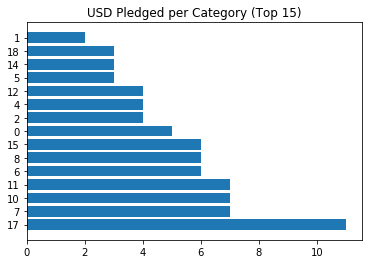

In [17]:
def pledged_per_category(df):
    from collections import Counter
    counts = dict(Counter(df['Cat_Name']).most_common(15))
    pubs = list(counts.keys())
    nums = list(counts.values())

    import matplotlib.pyplot as plt 
    %matplotlib inline
    import numpy as np
    y_pos = np.arange(len(pubs))
    plt.barh(y_pos,nums)
    plt.title('USD Pledged per Category (Top 15)')
    plt.yticks(y_pos,pubs)

    return plt.show()

pledged_per_category(df)